In [71]:
%time
from sklearn import datasets
import numpy as np 
iris = datasets.load_iris()
x = iris.data[:, [2, 3]]
y = iris.target
print('How many unique target classification labels: ', len(np.unique(y)))
print(iris.data.shape)
print(x.shape)

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 7.87 µs
How many unique target classification labels:  3
(150, 4)
(150, 2)


In [72]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=1, stratify=y)
print(x_test)
print(np.bincount(y))
print(np.bincount(y_train))
print(np.bincount(y_test))

[[5.4 2.3]
 [1.7 0.4]
 [1.4 0.3]
 [4.5 1.7]
 [4.4 1.4]
 [4.  1.3]
 [5.8 1.8]
 [4.5 1.5]
 [5.3 1.9]
 [1.3 0.4]
 [1.5 0.4]
 [4.9 1.8]
 [1.4 0.2]
 [3.3 1. ]
 [1.4 0.2]
 [4.8 1.4]
 [5.1 2.3]
 [4.5 1.5]
 [4.3 1.3]
 [5.2 2. ]
 [5.9 2.1]
 [1.4 0.1]
 [4.4 1.4]
 [4.9 2. ]
 [4.2 1.3]
 [4.7 1.6]
 [3.  1.1]
 [5.7 2.5]
 [1.6 0.6]
 [5.  2. ]
 [1.6 0.2]
 [1.4 0.2]
 [4.  1. ]
 [4.  1.3]
 [6.3 1.8]
 [5.5 2.1]
 [1.4 0.1]
 [1.6 0.2]
 [1.4 0.2]
 [4.7 1.4]
 [5.7 2.3]
 [5.1 1.8]
 [4.6 1.5]
 [1.5 0.2]
 [1.5 0.1]]
[50 50 50]
[35 35 35]
[15 15 15]


In [73]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X=x_train)
x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)
from sklearn.linear_model import Perceptron
ppn = Perceptron(eta0 = 0.1, random_state = 1)
ppn.fit(x_train_std, y_train)

Perceptron(eta0=0.1, random_state=1)

In [74]:
y_pred = ppn.predict(x_test_std)
print((y_test != y_pred).sum())
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))
print(ppn.score(x_test_std, y_test))

1
0.9777777777777777
0.9777777777777777


(150, 2)
[[ 0.89820289  1.44587881]
 [-1.16537974 -1.04507821]
 [-1.33269725 -1.17618121]
 [ 0.39625036  0.65926081]
 [ 0.34047786  0.2659518 ]
 [ 0.11738784  0.1348488 ]
 [ 1.12129291  0.79036381]
 [ 0.39625036  0.3970548 ]
 [ 0.84243039  0.92146681]
 [-1.38846976 -1.04507821]
 [-1.27692475 -1.04507821]
 [ 0.61934037  0.79036381]
 [-1.33269725 -1.30728421]
 [-0.27301968 -0.2584602 ]
 [-1.33269725 -1.30728421]
 [ 0.56356787  0.2659518 ]
 [ 0.73088538  1.44587881]
 [ 0.39625036  0.3970548 ]
 [ 0.28470535  0.1348488 ]
 [ 0.78665788  1.05256981]
 [ 1.17706541  1.18367281]
 [-1.33269725 -1.43838721]
 [ 0.34047786  0.2659518 ]
 [ 0.61934037  1.05256981]
 [ 0.22893285  0.1348488 ]
 [ 0.50779537  0.5281578 ]
 [-0.4403372  -0.1273572 ]
 [ 1.0655204   1.70808482]
 [-1.22115225 -0.78287221]
 [ 0.67511288  1.05256981]
 [-1.22115225 -1.30728421]
 [-1.33269725 -1.30728421]
 [ 0.11738784 -0.2584602 ]
 [ 0.11738784  0.1348488 ]
 [ 1.40015543  0.79036381]
 [ 0.9539754   1.18367281]
 [-1.33269725 -1.43

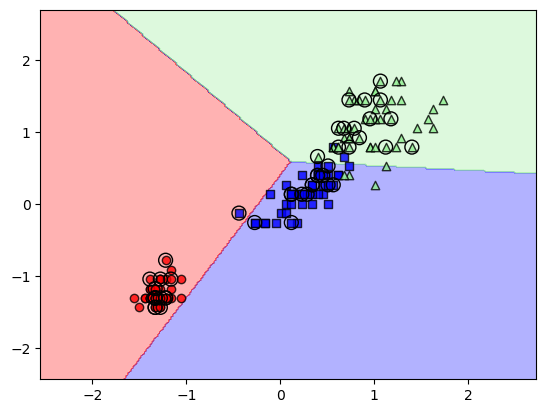

In [79]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

# To check recent matplotlib compatibility
import matplotlib
from distutils.version import LooseVersion


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=f'Class {cl}', 
                    edgecolor='black')

    # highlight test examples
    if test_idx:
        # plot all examples
        print(X[test_idx, :])
        X_test = X[test_idx, :]
        
        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='none',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='Test set')       
x_combined_std = np.vstack((x_train_std, x_test_std))
print(x_combined_std.shape)
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X=x_combined_std, y=y_combined, classifier=ppn, test_idx=range(105, 150))

Above: Linear classification
Below: Logistic regression

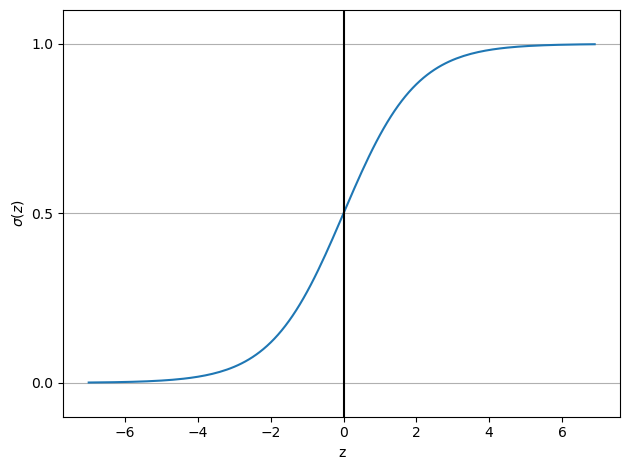

In [80]:
import matplotlib.pyplot as plt
import numpy as np


def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

z = np.arange(-7, 7, 0.1)
sigma_z = sigmoid(z)

plt.plot(z, sigma_z)
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\sigma (z)$')

# y axis ticks and gridline
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)

plt.tight_layout()

Logistic_regression
multinomial: mutually exclusive

[[ 0.89820289  1.44587881]
 [-1.16537974 -1.04507821]
 [-1.33269725 -1.17618121]
 [ 0.39625036  0.65926081]
 [ 0.34047786  0.2659518 ]
 [ 0.11738784  0.1348488 ]
 [ 1.12129291  0.79036381]
 [ 0.39625036  0.3970548 ]
 [ 0.84243039  0.92146681]
 [-1.38846976 -1.04507821]
 [-1.27692475 -1.04507821]
 [ 0.61934037  0.79036381]
 [-1.33269725 -1.30728421]
 [-0.27301968 -0.2584602 ]
 [-1.33269725 -1.30728421]
 [ 0.56356787  0.2659518 ]
 [ 0.73088538  1.44587881]
 [ 0.39625036  0.3970548 ]
 [ 0.28470535  0.1348488 ]
 [ 0.78665788  1.05256981]
 [ 1.17706541  1.18367281]
 [-1.33269725 -1.43838721]
 [ 0.34047786  0.2659518 ]
 [ 0.61934037  1.05256981]
 [ 0.22893285  0.1348488 ]
 [ 0.50779537  0.5281578 ]
 [-0.4403372  -0.1273572 ]
 [ 1.0655204   1.70808482]
 [-1.22115225 -0.78287221]
 [ 0.67511288  1.05256981]
 [-1.22115225 -1.30728421]
 [-1.33269725 -1.30728421]
 [ 0.11738784 -0.2584602 ]
 [ 0.11738784  0.1348488 ]
 [ 1.40015543  0.79036381]
 [ 0.9539754   1.18367281]
 [-1.33269725 -1.43838721]
 

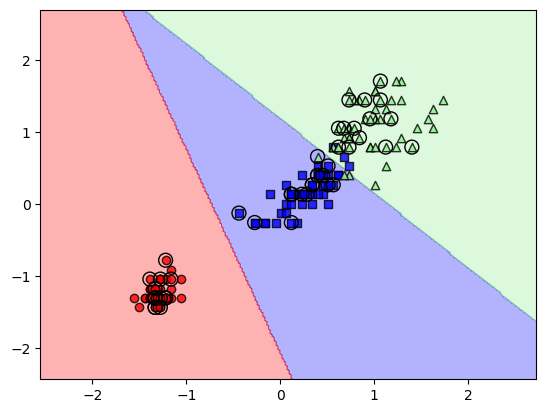

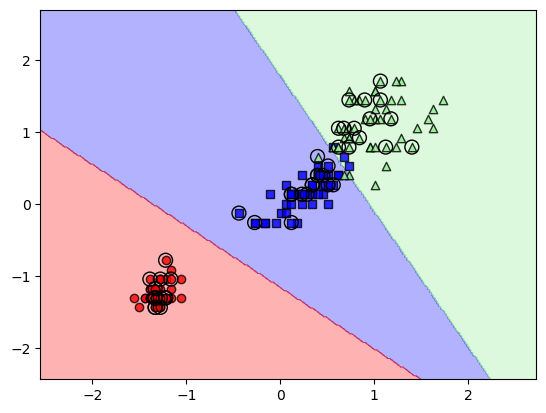

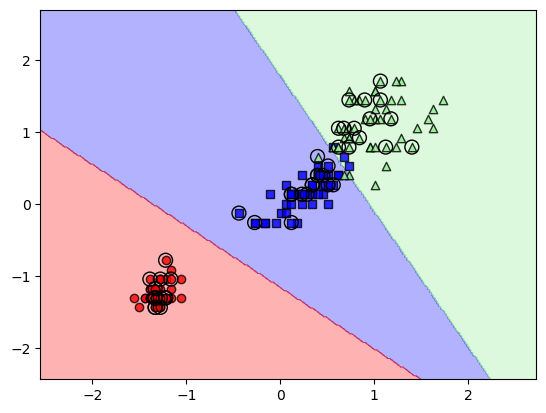

In [85]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C = 100.0, solver='lbfgs', multi_class='ovr')
lr.fit(x_train_std, y_train)
plt.figure()
plot_decision_regions(X=x_combined_std, y=y_combined, classifier=lr, test_idx=range(105, 150))
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C = 100.0, solver='lbfgs', multi_class='multinomial')
lr.fit(x_train_std, y_train)
plt.figure()
plot_decision_regions(X=x_combined_std, y=y_combined, classifier=lr, test_idx=range(105, 150))
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C = 100.0, solver='lbfgs', multi_class='auto')
lr.fit(x_train_std, y_train)
plt.figure()
plot_decision_regions(X=x_combined_std, y=y_combined, classifier=lr, test_idx=range(105, 150))

In [87]:
lr.score(x_test_std, y_test)

0.9777777777777777

Maximum margin classification using support vector machines SVM

[[ 0.89820289  1.44587881]
 [-1.16537974 -1.04507821]
 [-1.33269725 -1.17618121]
 [ 0.39625036  0.65926081]
 [ 0.34047786  0.2659518 ]
 [ 0.11738784  0.1348488 ]
 [ 1.12129291  0.79036381]
 [ 0.39625036  0.3970548 ]
 [ 0.84243039  0.92146681]
 [-1.38846976 -1.04507821]
 [-1.27692475 -1.04507821]
 [ 0.61934037  0.79036381]
 [-1.33269725 -1.30728421]
 [-0.27301968 -0.2584602 ]
 [-1.33269725 -1.30728421]
 [ 0.56356787  0.2659518 ]
 [ 0.73088538  1.44587881]
 [ 0.39625036  0.3970548 ]
 [ 0.28470535  0.1348488 ]
 [ 0.78665788  1.05256981]
 [ 1.17706541  1.18367281]
 [-1.33269725 -1.43838721]
 [ 0.34047786  0.2659518 ]
 [ 0.61934037  1.05256981]
 [ 0.22893285  0.1348488 ]
 [ 0.50779537  0.5281578 ]
 [-0.4403372  -0.1273572 ]
 [ 1.0655204   1.70808482]
 [-1.22115225 -0.78287221]
 [ 0.67511288  1.05256981]
 [-1.22115225 -1.30728421]
 [-1.33269725 -1.30728421]
 [ 0.11738784 -0.2584602 ]
 [ 0.11738784  0.1348488 ]
 [ 1.40015543  0.79036381]
 [ 0.9539754   1.18367281]
 [-1.33269725 -1.43838721]
 

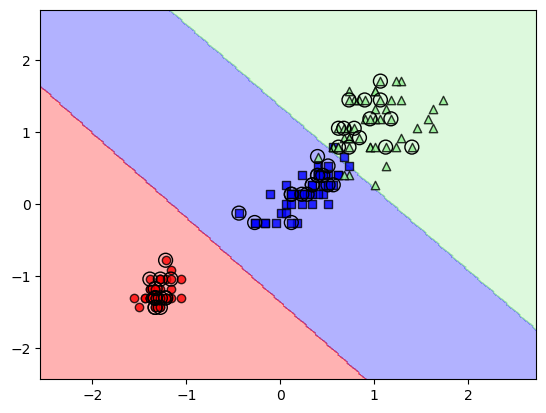

In [89]:
from sklearn.svm import SVC
svm = SVC(kernel = 'linear', C = 1.0, random_state= 1)
svm.fit(x_train_std, y_train)
plot_decision_regions(X=x_combined_std, y=y_combined, classifier=svm, test_idx=range(105, 150))

If too large to fit inside memory

In [ ]:
from sklearn.linear_model import SGDClassifier
ppn = SGDClassifier(loss = 'perceptron')
lr = SGDClassifier(loss = 'log')
svm = SGDClassifier(loss = 'hinge')

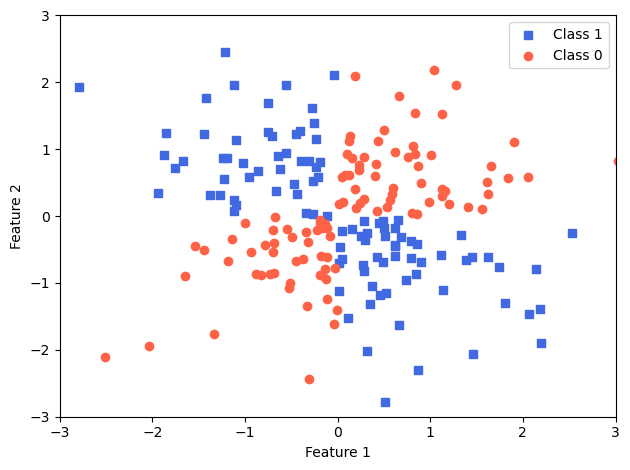

In [91]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(1)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0,
                       X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, 0)
plt.scatter(X_xor[y_xor == 1, 0],
            X_xor[y_xor == 1, 1],
            c='royalblue',
            marker='s',
            label='Class 1')
plt.scatter(X_xor[y_xor == 0, 0],
            X_xor[y_xor == 0, 1],
            c='tomato',
            marker='o',
            label='Class 0')

plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.legend(loc='best')
plt.tight_layout()
#plt.savefig('figures/03_12.png', dpi=300)
plt.show()

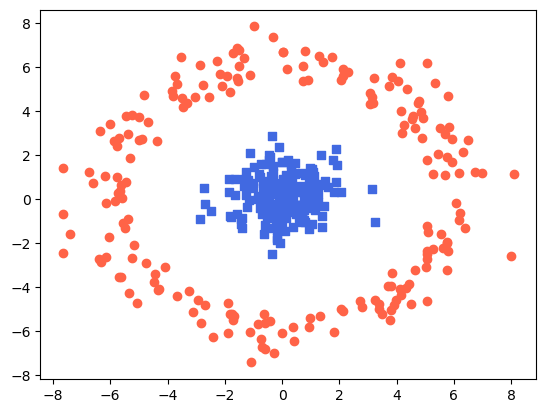

In [98]:
X_circle = np.random.randn(200, 2)

y_circle = X_circle + 5 * X_circle / np.linalg.norm(X_circle, axis = 1).reshape(-1, 1)
plt.scatter(X_circle[:, 0],
            X_circle[:, 1],
            c='royalblue',
            marker='s',
            label='Class 1')
plt.scatter(y_circle[:, 0],
            y_circle[:, 1],
            c='tomato',
            marker='o',
            label='Class 0')

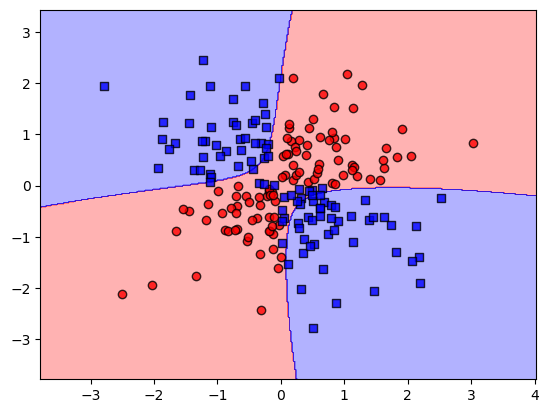

In [99]:
svm = SVC(kernel='rbf', random_state=1, gamma=0.10, C=10.0)
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor,
                      classifier=svm)

[[ 0.89820289  1.44587881]
 [-1.16537974 -1.04507821]
 [-1.33269725 -1.17618121]
 [ 0.39625036  0.65926081]
 [ 0.34047786  0.2659518 ]
 [ 0.11738784  0.1348488 ]
 [ 1.12129291  0.79036381]
 [ 0.39625036  0.3970548 ]
 [ 0.84243039  0.92146681]
 [-1.38846976 -1.04507821]
 [-1.27692475 -1.04507821]
 [ 0.61934037  0.79036381]
 [-1.33269725 -1.30728421]
 [-0.27301968 -0.2584602 ]
 [-1.33269725 -1.30728421]
 [ 0.56356787  0.2659518 ]
 [ 0.73088538  1.44587881]
 [ 0.39625036  0.3970548 ]
 [ 0.28470535  0.1348488 ]
 [ 0.78665788  1.05256981]
 [ 1.17706541  1.18367281]
 [-1.33269725 -1.43838721]
 [ 0.34047786  0.2659518 ]
 [ 0.61934037  1.05256981]
 [ 0.22893285  0.1348488 ]
 [ 0.50779537  0.5281578 ]
 [-0.4403372  -0.1273572 ]
 [ 1.0655204   1.70808482]
 [-1.22115225 -0.78287221]
 [ 0.67511288  1.05256981]
 [-1.22115225 -1.30728421]
 [-1.33269725 -1.30728421]
 [ 0.11738784 -0.2584602 ]
 [ 0.11738784  0.1348488 ]
 [ 1.40015543  0.79036381]
 [ 0.9539754   1.18367281]
 [-1.33269725 -1.43838721]
 

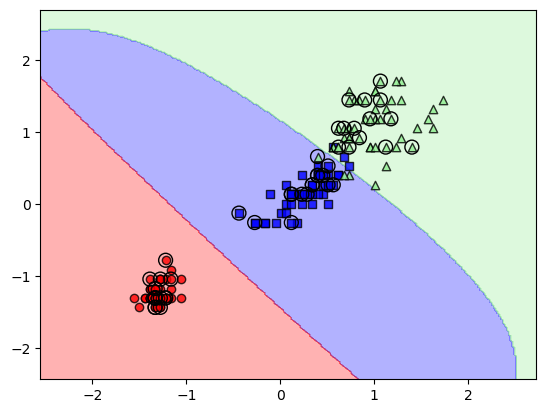

In [100]:
svm = SVC(kernel='rbf', random_state=1, gamma=0.20, C=1.0)
svm.fit(x_train_std, y_train)
plot_decision_regions(X=x_combined_std, y=y_combined, classifier=svm, test_idx=range(105, 150))

[[ 0.89820289  1.44587881]
 [-1.16537974 -1.04507821]
 [-1.33269725 -1.17618121]
 [ 0.39625036  0.65926081]
 [ 0.34047786  0.2659518 ]
 [ 0.11738784  0.1348488 ]
 [ 1.12129291  0.79036381]
 [ 0.39625036  0.3970548 ]
 [ 0.84243039  0.92146681]
 [-1.38846976 -1.04507821]
 [-1.27692475 -1.04507821]
 [ 0.61934037  0.79036381]
 [-1.33269725 -1.30728421]
 [-0.27301968 -0.2584602 ]
 [-1.33269725 -1.30728421]
 [ 0.56356787  0.2659518 ]
 [ 0.73088538  1.44587881]
 [ 0.39625036  0.3970548 ]
 [ 0.28470535  0.1348488 ]
 [ 0.78665788  1.05256981]
 [ 1.17706541  1.18367281]
 [-1.33269725 -1.43838721]
 [ 0.34047786  0.2659518 ]
 [ 0.61934037  1.05256981]
 [ 0.22893285  0.1348488 ]
 [ 0.50779537  0.5281578 ]
 [-0.4403372  -0.1273572 ]
 [ 1.0655204   1.70808482]
 [-1.22115225 -0.78287221]
 [ 0.67511288  1.05256981]
 [-1.22115225 -1.30728421]
 [-1.33269725 -1.30728421]
 [ 0.11738784 -0.2584602 ]
 [ 0.11738784  0.1348488 ]
 [ 1.40015543  0.79036381]
 [ 0.9539754   1.18367281]
 [-1.33269725 -1.43838721]
 

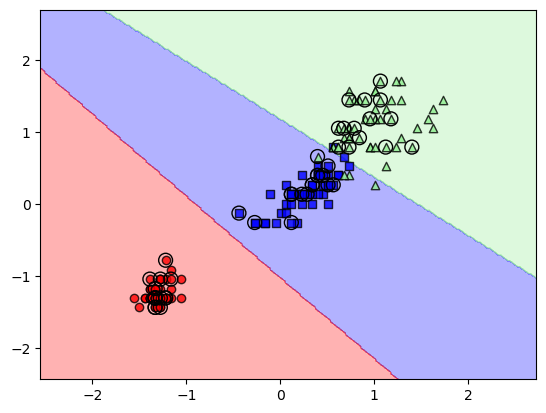

In [106]:
svm = SVC(kernel='rbf', random_state=1, gamma=0.01, C=1.0)
svm.fit(x_train_std, y_train)
plot_decision_regions(X=x_combined_std, y=y_combined, classifier=svm, test_idx=range(105, 150))

Information gain: entropy, gini impurity, classification error

[[ 0.89820289  1.44587881]
 [-1.16537974 -1.04507821]
 [-1.33269725 -1.17618121]
 [ 0.39625036  0.65926081]
 [ 0.34047786  0.2659518 ]
 [ 0.11738784  0.1348488 ]
 [ 1.12129291  0.79036381]
 [ 0.39625036  0.3970548 ]
 [ 0.84243039  0.92146681]
 [-1.38846976 -1.04507821]
 [-1.27692475 -1.04507821]
 [ 0.61934037  0.79036381]
 [-1.33269725 -1.30728421]
 [-0.27301968 -0.2584602 ]
 [-1.33269725 -1.30728421]
 [ 0.56356787  0.2659518 ]
 [ 0.73088538  1.44587881]
 [ 0.39625036  0.3970548 ]
 [ 0.28470535  0.1348488 ]
 [ 0.78665788  1.05256981]
 [ 1.17706541  1.18367281]
 [-1.33269725 -1.43838721]
 [ 0.34047786  0.2659518 ]
 [ 0.61934037  1.05256981]
 [ 0.22893285  0.1348488 ]
 [ 0.50779537  0.5281578 ]
 [-0.4403372  -0.1273572 ]
 [ 1.0655204   1.70808482]
 [-1.22115225 -0.78287221]
 [ 0.67511288  1.05256981]
 [-1.22115225 -1.30728421]
 [-1.33269725 -1.30728421]
 [ 0.11738784 -0.2584602 ]
 [ 0.11738784  0.1348488 ]
 [ 1.40015543  0.79036381]
 [ 0.9539754   1.18367281]
 [-1.33269725 -1.43838721]
 

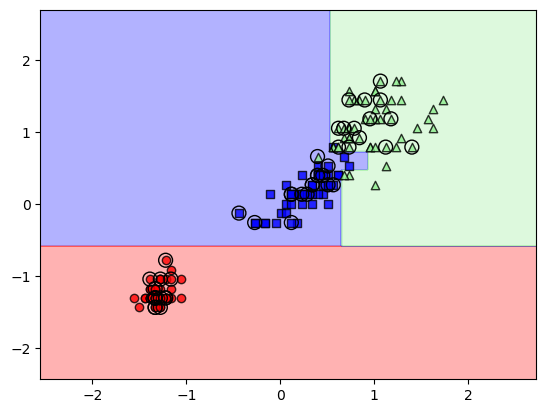

In [123]:
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier(criterion="gini", max_depth=7, random_state=1)
tree_model.fit(x_train_std, y_train)
x_combined_std = np.vstack((x_train_std, x_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(x_combined_std, y_combined, classifier=tree_model, test_idx=range(len(x_train_std), len(y_combined)))

[Text(0.4090909090909091, 0.875, 'X[0] <= -1.009\nentropy = 1.0\nsamples = 200\nvalue = [100, 100]'),
 Text(0.18181818181818182, 0.625, 'X[1] <= -0.134\nentropy = 0.863\nsamples = 28\nvalue = [8, 20]'),
 Text(0.09090909090909091, 0.375, 'entropy = 0.0\nsamples = 8\nvalue = [8, 0]'),
 Text(0.2727272727272727, 0.375, 'entropy = 0.0\nsamples = 20\nvalue = [0, 20]'),
 Text(0.6363636363636364, 0.625, 'X[1] <= 0.045\nentropy = 0.996\nsamples = 172\nvalue = [92, 80]'),
 Text(0.45454545454545453, 0.375, 'X[0] <= 0.006\nentropy = 0.977\nsamples = 95\nvalue = [39, 56]'),
 Text(0.36363636363636365, 0.125, 'entropy = 0.378\nsamples = 41\nvalue = [38, 3]'),
 Text(0.5454545454545454, 0.125, 'entropy = 0.133\nsamples = 54\nvalue = [1, 53]'),
 Text(0.8181818181818182, 0.375, 'X[0] <= -0.009\nentropy = 0.895\nsamples = 77\nvalue = [53, 24]'),
 Text(0.7272727272727273, 0.125, 'entropy = 0.0\nsamples = 24\nvalue = [0, 24]'),
 Text(0.9090909090909091, 0.125, 'entropy = 0.0\nsamples = 53\nvalue = [53, 0]')

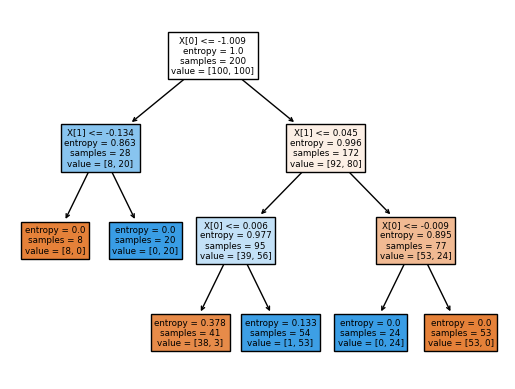

In [119]:
tree_model2 = DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state=1)
tree_model2.fit(X_xor, y_xor)
from sklearn import tree
plot_decision_regions(X_xor, y_xor, classifier=tree_model2)
tree.plot_tree(tree_model2, filled = True)

Random Forest
Average multiple deep decision trees that individually suffer from high variance to build a more robust model that has a better generalization performance and is less susceptible to overfitting

1. Draw a random bootstrap sample of size n
2. Grow a decision tree from the bootstrap sample:
    a. Randomly select d features without replacement
    b. Split the node using the feature that provides the best split according to the objective function, for instance, maximizing the information gain
3. Repeat steps 1-2 k times
4. Aggregate the prediction by each tree to assign the class label by majority vote


[[ 0.89820289  1.44587881]
 [-1.16537974 -1.04507821]
 [-1.33269725 -1.17618121]
 [ 0.39625036  0.65926081]
 [ 0.34047786  0.2659518 ]
 [ 0.11738784  0.1348488 ]
 [ 1.12129291  0.79036381]
 [ 0.39625036  0.3970548 ]
 [ 0.84243039  0.92146681]
 [-1.38846976 -1.04507821]
 [-1.27692475 -1.04507821]
 [ 0.61934037  0.79036381]
 [-1.33269725 -1.30728421]
 [-0.27301968 -0.2584602 ]
 [-1.33269725 -1.30728421]
 [ 0.56356787  0.2659518 ]
 [ 0.73088538  1.44587881]
 [ 0.39625036  0.3970548 ]
 [ 0.28470535  0.1348488 ]
 [ 0.78665788  1.05256981]
 [ 1.17706541  1.18367281]
 [-1.33269725 -1.43838721]
 [ 0.34047786  0.2659518 ]
 [ 0.61934037  1.05256981]
 [ 0.22893285  0.1348488 ]
 [ 0.50779537  0.5281578 ]
 [-0.4403372  -0.1273572 ]
 [ 1.0655204   1.70808482]
 [-1.22115225 -0.78287221]
 [ 0.67511288  1.05256981]
 [-1.22115225 -1.30728421]
 [-1.33269725 -1.30728421]
 [ 0.11738784 -0.2584602 ]
 [ 0.11738784  0.1348488 ]
 [ 1.40015543  0.79036381]
 [ 0.9539754   1.18367281]
 [-1.33269725 -1.43838721]
 

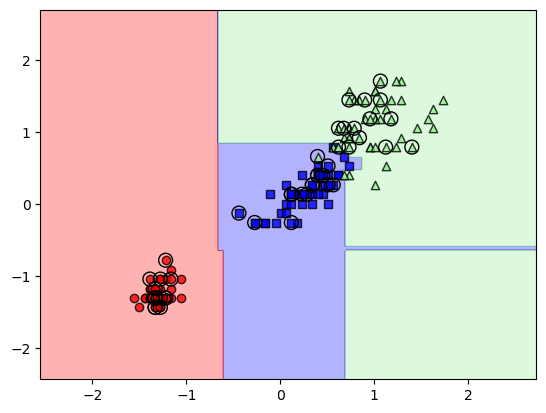

In [130]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=20, random_state=1, n_jobs=4)
forest.fit(x_train_std, y_train)
plot_decision_regions(x_combined_std, y_combined, classifier=forest, test_idx=range(105, 150))


K-nearest neighbors
1. Choose the number of k and a distance metric
2. Find the k-nearest neighbors of the data record that we want to classify
3. Assign the class label by majority vote

Downside: computational complexity

/Users/zeyu/pythonsys/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[[ 0.89820289  1.44587881]
 [-1.16537974 -1.04507821]
 [-1.33269725 -1.17618121]
 [ 0.39625036  0.65926081]
 [ 0.34047786  0.2659518 ]
 [ 0.11738784  0.1348488 ]
 [ 1.12129291  0.79036381]
 [ 0.39625036  0.3970548 ]
 [ 0.84243039  0.92146681]
 [-1.38846976 -1.04507821]
 [-1.27692475 -1.04507821]
 [ 0.61934037  0.79036381]
 [-1.33269725 -1.30728421]
 [-0.27301968 -0.2584602 ]
 [-1.33269725 -1.30728421]
 [ 0.56356787  0.2659518 ]
 [ 0.73088538  1.44587881]
 [ 0.39625036  0.3970548 ]
 [ 0.28470535  0.1348488 ]
 [ 0.78665788  1.05256981]
 [ 1.17706541  1.18367281]
 [-1.33269725 -1.43838721]
 [ 0.34047786  0.2659518 ]
 [ 0.61934037  1.05256981]
 [ 0.22893285  0.1348488 ]
 [ 0.50779537  0.5281578 ]
 [-0.4403372  -0.1273572 ]
 [ 1.0655204   1.70808482]
 [-1.22115225 -0.78287221]
 [ 0.67511288  1.05256981]
 [-1.22115225 -1.30728421]
 [-1.33269725 -1.30728421]
 [ 0.11738784 -0.2584602 ]
 [ 0.11738784  0.1348488 ]
 [ 1.40015543  0.79036381]
 [ 0.9539754   1.18367281]
 [-1.33269725 -1.43838721]
 

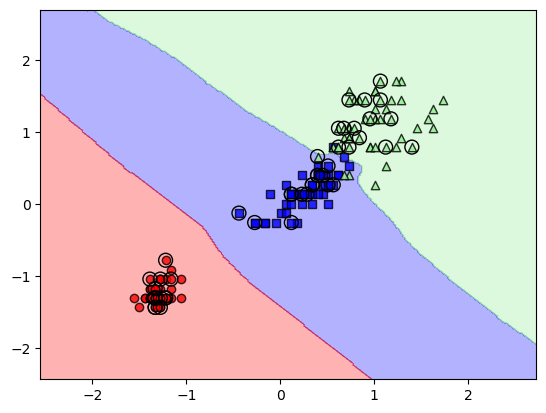

In [138]:
from sklearn.neighbors import KNeighborsClassifier
tree_model3 = KNeighborsClassifier(n_neighbors = 7, p = 3, metric = 'minkowski')
tree_model3.fit(x_train_std, y_train)
x_combined_std = np.vstack((x_train_std, x_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(x_combined_std, y_combined, classifier=tree_model3, test_idx=range(len(x_train_std), len(y_combined)))